**CII4Q3 Visi Komputer**

---



#Exercise 6a: Klasifikasi Cats vs Dogs

---
1.   Lengkapi code pada bagian #YOUR CODE HERE atau #YOUR CODE GOES HERE atau # YOUR CODE STARTS HERE  ...# YOUR CODE ENDS HERE.
2.   Selanjutnya, lakukan pengubahan pada code sehingga akurasi mencapai minimal 80%


In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [14]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, class_names):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True
    )

    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        classes=class_names
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        classes=class_names
    )
    return train_generator, validation_generator

class_names = os.listdir('dataset/train')
TRAINING_DIR = './dataset/train'
VALIDATION_DIR = './dataset/test'
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, class_names)


Found 2301 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


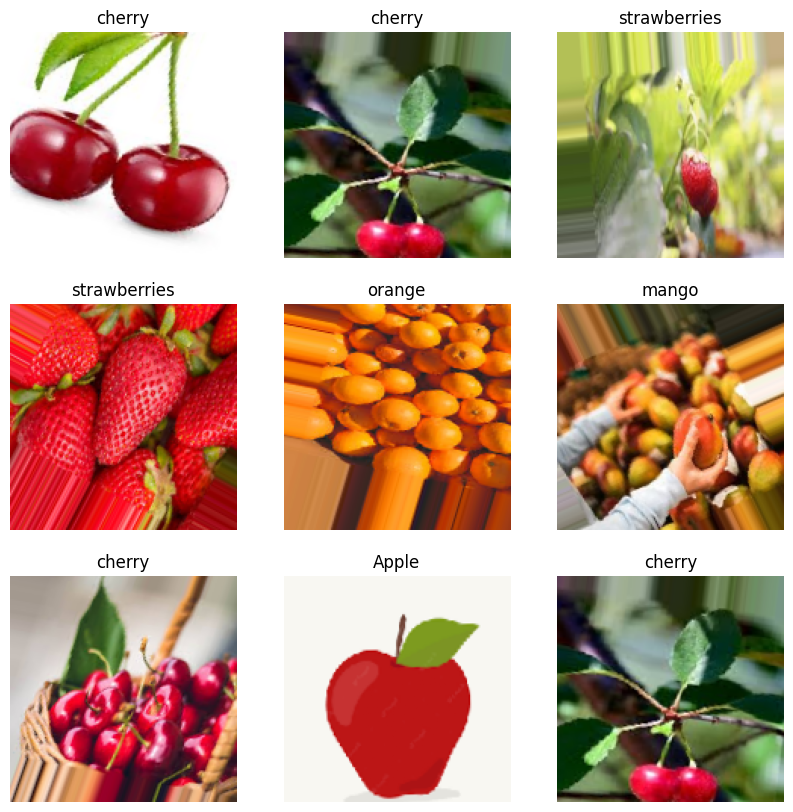

In [13]:
import matplotlib.pyplot as plt
import random

def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        idx = random.randint(0, len(images))
        plt.imshow(images[idx])
        plt.title(class_names[np.argmax(labels[idx])])
        plt.axis("off")
    plt.show()

images, labels = next(train_generator)
plot_images(images, labels, class_names)

In [15]:
def count_data(directory):
    count = {}
    for class_name in class_names:
        count[class_name] = len(os.listdir(os.path.join(directory, class_name)))
    return count

train_count = count_data(TRAINING_DIR)
validation_count = count_data(VALIDATION_DIR)
print(train_count)
print(validation_count)

{'Apple': 230, 'avocado': 230, 'Banana': 230, 'cherry': 230, 'kiwi': 230, 'mango': 231, 'orange': 230, 'pinenapple': 230, 'strawberries': 230, 'watermelon': 230}
{'Apple': 89, 'avocado': 105, 'Banana': 106, 'cherry': 105, 'kiwi': 105, 'mango': 105, 'orange': 97, 'pinenapple': 105, 'strawberries': 103, 'watermelon': 105}


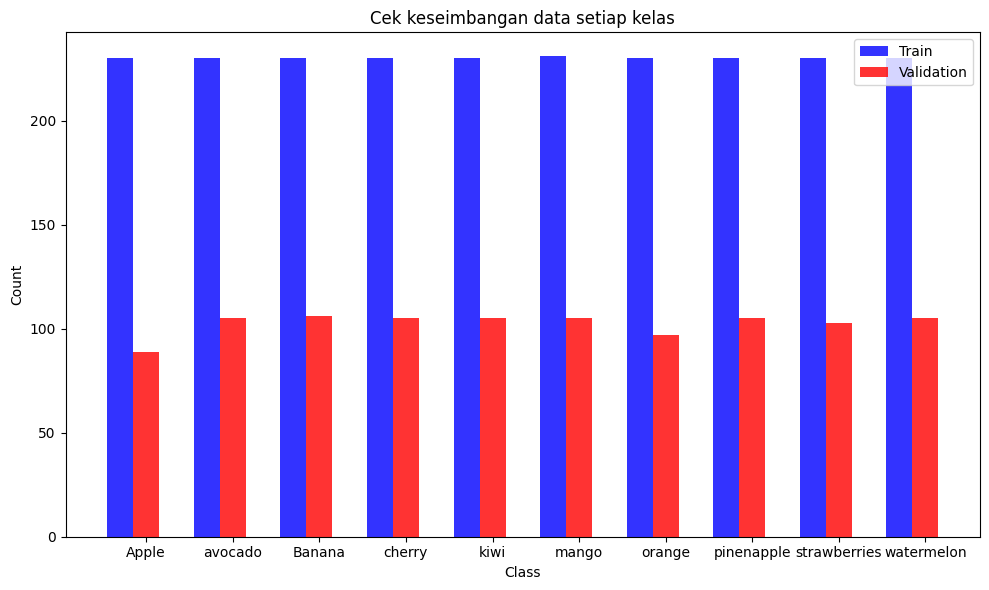

In [22]:
def plot_data_distribution(train_count, validation_count):
    fig, ax = plt.subplots()
    bar_width = 0.3
    opacity = 0.8
    index = np.arange(len(class_names))
    train_counts = [train_count[class_name] for class_name in class_names]
    validation_counts = [validation_count[class_name] for class_name in class_names]
    train_bar = plt.bar(index, train_counts, bar_width, alpha=opacity, color='b', label='Train')
    validation_bar = plt.bar(index + bar_width, validation_counts, bar_width, alpha=opacity, color='r', label='Validation')
    fig.set_size_inches(10, 6)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Cek keseimbangan data setiap kelas')
    plt.xticks(index + bar_width, class_names)
    plt.legend()
    plt.tight_layout()
    
plot_data_distribution(train_count, validation_count)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

d:\anaconda3\envs\yolov8\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,199,178 (73.24 MB)

 Trainable params: 19,199,178 (73.24 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/30


d:\anaconda3\envs\yolov8\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1080 - loss: 0.3984 - val_accuracy: 0.2254 - val_loss: 0.3018
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.2792 - loss: 0.2911 - val_accuracy: 0.3785 - val_loss: 0.2481
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 69s 699ms/step - accuracy: 0.3495 - loss: 0.2592 - val_accuracy: 0.4517 - val_loss: 0.2337
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 728ms/step - accuracy: 0.4310 - loss: 0.2382 - val_accuracy: 0.3863 - val_loss: 0.2741
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 53s 715ms/step - accuracy: 0.4505 - loss: 0.2291 - val_accuracy: 0.5083 - val_loss: 0.2213
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 726ms/step - accuracy: 0.5002 - loss: 0.2169 - val_accuracy: 0.4966 - val_loss: 0.2135
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 56s 759ms/step - accuracy: 0.5301 - loss: 0.2015 - val_accuracy: 0.5590 - val_loss: 0.1988
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 52s 703ms/step - accuracy: 0.5372 - loss: 0.2016 - val_accuracy: 0.5776 - 

Text(0.5, 1.0, 'Training and validation loss')

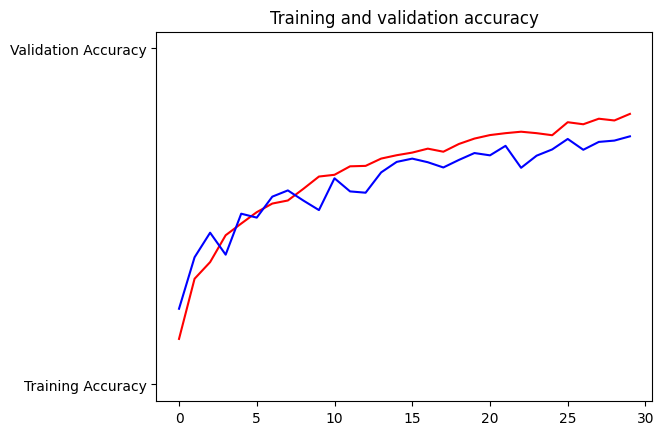

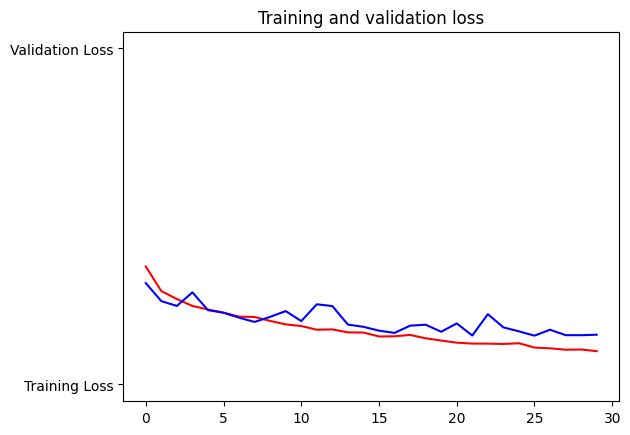

In [10]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


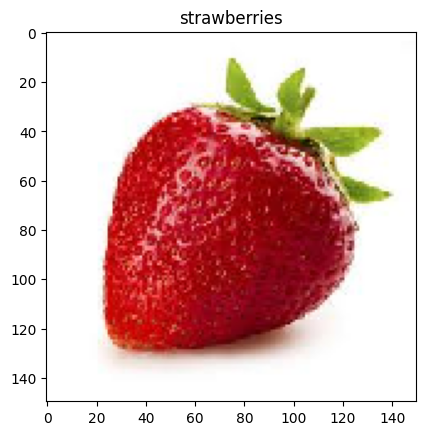

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [36]:
import os
import numpy as np
from keras.preprocessing import image

path = './dataset/predict'
img = 'f2.jpeg'
img_path = os.path.join(path, img)
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

plt.imshow(img)
plt.title(class_names[np.argmax(classes[0])])
plt.show()
print(classes)
    
